In [1]:
import pandas as pd 
from sklearn.datasets import load_boston

In [2]:
df = load_boston()

/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californi

In [3]:
dataset = pd.DataFrame(df.data)

In [4]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
dataset.columns= df.feature_names

In [6]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
X= dataset
y = df.target

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
X_train = scaler.fit_transform(X_train)


In [11]:
X_test = scaler.transform(X_test)

In [12]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


In [13]:
ridge_regression=Ridge()

In [14]:
parameters = {'alpha':[1,2,3,5,12,23,27,56,67,78,89,98]}
ridgecv = GridSearchCV(ridge_regression,parameters,scoring = 'neg_mean_squared_error',cv = 5)
ridgecv.fit(X_train,y_train)
 

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 5, 12, 23, 27, 56, 67, 78, 89, 98]},
             scoring='neg_mean_squared_error')

In [15]:
print(ridgecv.best_params_)

{'alpha': 12}


In [16]:
ridge_pred = ridgecv.predict(X_test)

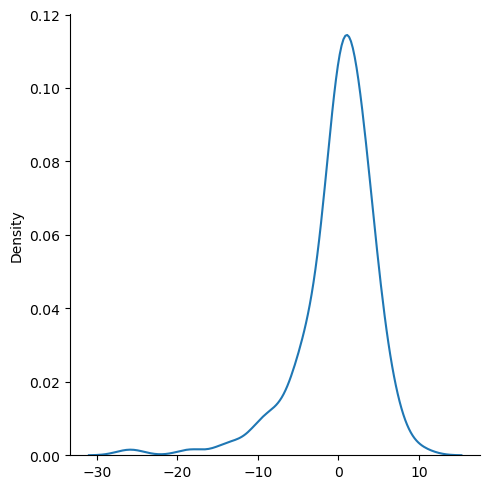

In [17]:
import seaborn as sns 
sns.displot(ridge_pred-y_test,kind='kde')

### Lasso Regression 

In [18]:
from sklearn.linear_model import Lasso


In [19]:
lasso = Lasso()

In [20]:
parameters = {'alpha':[1,2,3,5,6,7,10,12,23,27,56,67,78,89,98,]}
lassocv = GridSearchCV(lasso,parameters,scoring = 'neg_mean_squared_error',cv = 5)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 3, 5, 6, 7, 10, 12, 23, 27, 56, 67, 78,
                                   89, 98]},
             scoring='neg_mean_squared_error')

In [21]:
print(lassocv.best_params_)

{'alpha': 1}


In [22]:
print(lassocv.best_score_)

-31.153603752119004


In [23]:
lasso_pred = lassocv.predict(X_test)

In [24]:
lasso_pred

array([26.12212011, 30.64819603, 17.74859418, 25.19460935, 19.2946692 ,
       22.82279099, 18.29163625, 14.64075609, 21.39330664, 20.41184791,
       20.63763155, 21.04309429,  1.20212245, 22.48770149, 20.32863075,
       24.82509724, 18.13265187,  6.81250853, 36.09245901, 18.45054869,
       25.64506153, 26.80170403, 13.73714037, 24.01576341, 18.81760059,
       15.4264936 , 22.86865424, 19.00799481, 19.78638284, 19.64740851,
       19.93060152, 25.47637139, 25.2188929 , 19.46825782, 15.87043757,
       20.50660407, 31.02198968, 21.6519024 , 21.52470923, 24.76908959,
       14.39002311, 27.57471172, 36.56725739, 19.58680457, 25.573017  ,
       17.1872521 , 15.93361988, 25.87675365, 19.35466887, 29.59665087,
       23.11788464, 31.50427155, 17.53234012, 25.85419661, 35.21484659,
       22.89869915, 19.39011084, 29.39749368, 24.66544216, 16.65559649,
       25.47892536, 30.80725782, 28.94063044, 18.30751821, 27.60126279,
       14.37892853, 20.05681263, 25.59068988, 28.35700042, 16.00

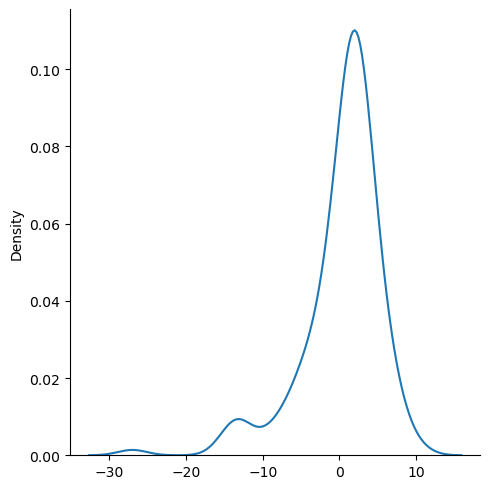

In [25]:
sns.displot(lasso_pred-y_test,kind='kde')

In [26]:
from sklearn.linear_model import ElasticNet


In [27]:
elasticnet = ElasticNet()

In [28]:
elasticnet.fit(X,y)

ElasticNet()

In [29]:
elastic_pred = elasticnet.predict(y_test)

/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[23.6 32.4 13.6 22.8 16.1 20.  17.8 14.  19.6 16.8 21.5 18.9  7.  21.2
 18.5 29.8 18.8 10.2 50.  14.1 25.2 29.1 12.7 22.4 14.2 13.8 20.3 14.9
 21.7 18.3 23.1 23.8 15.  20.8 19.1 19.4 34.7 19.5 24.4 23.4 19.7 28.2
 50.  17.4 22.6 15.1 13.1 24.2 19.9 24.  18.9 35.4 15.2 26.5 43.5 21.2
 18.4 28.5 23.9 18.5 25.  35.4 31.5 20.2 24.1 20.  13.1 24.8 30.8 12.7
 20.  23.7 10.8 20.6 20.8  5.  20.1 48.5 10.9  7.  20.9 17.2 20.9  9.7
 19.4 29.  16.4 25.  25.  17.1 23.2 10.4 19.6 17.2 27.5 23.  50.  17.9
  9.6 17.2 22.5 21.4 12.  19.9 19.4 13.4 18.2 24.6 21.1 24.7  8.7 27.5
 20.7 36.2 31.6 11.7 39.8 13.9 21.8 23.7 17.6 24.4  8.8 19.2 25.3 20.4
 23.1 37.9 15.6 45.4 15.7 22.6 14.5 18.7 17.8 16.1 20.6 31.6 29.1 15.6
 17.5 22.5 19.4 19.3  8.5 20.6 17.  17.1 14.5 50.  14.3 12.6].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.